2023 AML - Mini Project

Group 16

Steps:
1. Intro: description of the task, relevant background and related previous work.
2. Exploratory data analysis.
3. Data preparation, preprocessing and visualization.
4. Methodology: description of the learning (e.g. classification) methods used.
5. Results and evaluation
6. conclusions

Our task:

Using 'rank' or "Points" as a label to predict the future popularity of songs. 

*** Some general feedback below, collated from the discussions we had with you today. 


- note the Author Instructions on the course mini-project page 

- report should be comprehensible for a competent technical reader  

  + be clear about the exact questions/tasks you're tackling  

  + motivate/explain why any choices made are reasonable: not just 'did x and y' 

- more than just a direct application of a single predictive/clustering task  

  + analysis of different methods for same task, and/or  

  + analysis of different settings/hyperparameters 

- if multiple questions; ensure sufficient analyses for each 

- optimisation / efficiency can be important, but important not to worry prematurely 

- think about analysis to discuss what drives performance or lack of such 

- describe methods with regard to their use in your task(s), not generic descriptions/equations 

- ensure terminology and formulation (variable names etc.) is consistent across the report 

- don't include information or equation/tables/figures that aren't relevant for the tasks/evals  

  + not just a space-filling exercise 

- DO NOT modify given template (no names only student IDs, `\hline` separators, etc)  

  + best to run/compile the source using Overleaf or DICE machines 

- useful LaTeX resources especially for tables/figures  

  + use the space well for putting figures and tables together [subfigures, wrapfigures, etc]  

  + https://www.overleaf.com/learn/latex/Positioning_images_and_tables   

  + https://www.overleaf.com/learn/latex/How_to_Write_a_Thesis_in_LaTeX_(Part_3)%3A_Figures%2C_Subfigures_and_Tables   

  + as long as you don't modify the template and change page geometries or font types and sizes, you should be able to organise layout of things quite freely. 


Six pages is not a lot of space, so make sure you're thinking about how much work/writing you can fit into the given limits. Usually, some form of story-boarding[1] will help you get a good idea of how much info can go where in the report.

# 1. Description of the task.

Given a song, try to predict it's popularity rank in the list) in the future based on several features.

# 2. Data preparation & Preprocessing

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# Read dataset
data_loc = os.path.join(os.getcwd(), 'Spotify_Dataset_V3.csv')
dataset = pd.read_csv(data_loc, delimiter = ';')

In [3]:
ori_dataset = pd.read_csv(os.path.join(os.getcwd(), 'Spotify_Dataset_V3.csv'), delimiter = ';')

In [4]:
# Show Data Info
print("Shape of Dataset: ", dataset.shape)
print("\n*** Data Info ***:\n")
print(dataset.describe())
dataset

Shape of Dataset:  (651936, 20)

*** Data Info ***:

                Rank   Danceability         Energy       Loudness  \
count  651936.000000  651936.000000  651936.000000  651936.000000   
mean      100.407782       0.697730       0.652049   -5295.645217   
std        57.406664       0.133186       0.155684    2785.261321   
min         1.000000       0.073000       0.005000  -34475.000000   
25%        51.000000       0.617000       0.549000   -6825.000000   
50%       100.000000       0.719000       0.671000   -5206.000000   
75%       150.000000       0.793000       0.771000   -3885.000000   
max       200.000000       0.985000       0.996000    1509.000000   

         Speechiness   Acousticness  Instrumentalness        Valence  \
count  651936.000000  651936.000000     651936.000000  651936.000000   
mean        0.109946       0.230694          0.007647       0.523134   
std         0.096841       0.230710          0.054724       0.223926   
min         0.022000       0.000000  

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651931,197,Oh Lord,MiC LOWRY,01/01/2017,0.273,0.794,-6644.0,0.068,0.022,0.000,0.377,Artist 1,MiC LOWRY,Nationality 1,United Kingdom,Europe,4,4.0,1sTUEdVO85YU8Ymk2jeAls,https://open.spotify.com/track/1sTUEdVO85YU8Ym...
651932,198,Superstition - Single Version,Stevie Wonder,01/01/2017,0.650,0.658,-10908.0,0.085,0.089,0.004,0.883,Artist 1,Stevie Wonder,Nationality 1,United States,Anglo-America,3,3.0,5lXcSvHRVjQJ3LB2rLKQog,https://open.spotify.com/track/5lXcSvHRVjQJ3LB...
651933,199,Secrets,The Weeknd,01/01/2017,0.665,0.771,-5779.0,0.053,0.016,0.000,0.764,Artist 1,The Weeknd,Nationality 1,Canada,Anglo-America,2,2.0,3DX4Y0egvc0slLcLl31h2p,https://open.spotify.com/track/3DX4Y0egvc0slLc...
651934,200,Ni**as In Paris,"JAY-Z, Kanye West",01/01/2017,0.757,0.882,-6125.0,0.248,0.076,0.000,0.684,Artist 1,JAY-Z,Nationality 1,United States,Anglo-America,1,1.0,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7n...


In [5]:
# Create Artist_Count
dataset['Artist_Count'] = dataset['Artists'].apply(lambda x: len(str(x).split(',')))

# Choose features and label
drop_list = ["Rank", "Artists", "Date", "# of Artist", "# of Nationality", "id", "Song URL"]
dataset = dataset.drop(columns = drop_list, axis = -1).copy()

# Check any missing value -> No missing data points.
dataset.isnull().any()

Title                               False
Danceability                        False
Energy                              False
Loudness                            False
Speechiness                         False
Acousticness                        False
Instrumentalness                    False
Valence                             False
Artist (Ind.)                       False
Nationality                         False
Continent                           False
Points (Total)                      False
Points (Ind for each Artist/Nat)    False
Artist_Count                        False
dtype: bool

Number of unique values in 'Artist (Ind.)': 2208
# Artist shown less or equal than 10000 times: 2203
# Artist shown less or equal than 1000 times: 2065
# Artist shown less or equal than 100 times: 1407
# Artist shown less or equal than 50 times: 1122
# Artist shown less or equal than 10 times: 690
# Artist shown less or equal than 1 times: 248


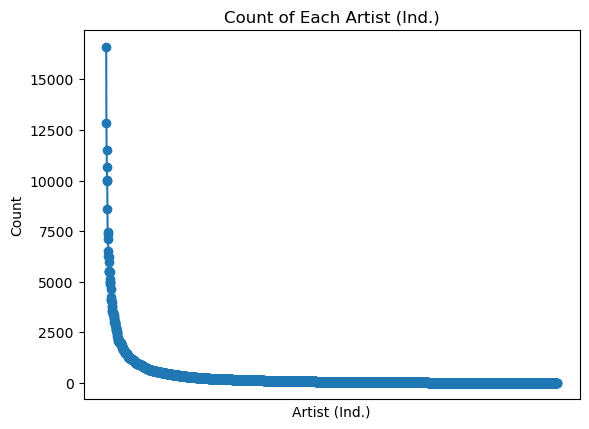

In [6]:
# Get frequency of artists.
# We may replace artists whose frequecny is less than 50 times with "Rest" to reduce dimension.
unique_values_count = dataset["Artist (Ind.)"].nunique()
print(f"Number of unique values in 'Artist (Ind.)': {unique_values_count}")


value_counts = dataset["Artist (Ind.)"].value_counts()
threshold = [10000, 1000 ,100, 50, 10, 1]
for thre in threshold:
    filtered_data = value_counts[value_counts <= thre]
    print(f"# Artist shown less or equal than {thre} times: {filtered_data.count()}")

# Plots
value_counts.plot(kind = 'line', marker='o')

plt.title("Count of Each Artist (Ind.)")
plt.xlabel("Artist (Ind.)")
plt.ylabel("Count")
plt.xticks([])

plt.show()

# Nationalities shown less or equal than 100000 times: 73
# Nationalities shown less or equal than 10000 times: 66
# Nationalities shown less or equal than 5000 times: 59
# Nationalities shown less or equal than 1000 times: 44
# Nationalities shown less or equal than 100 times: 26
# Nationalities shown less or equal than 50 times: 21
# Nationalities shown less or equal than 10 times: 14
# Nationalities shown less or equal than 1 times: 6


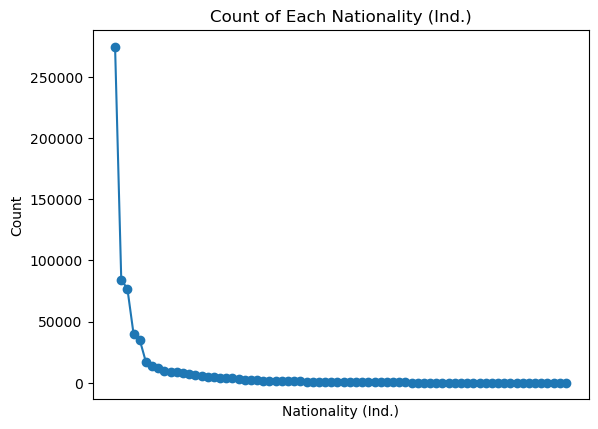

In [7]:
# Get frequency of Nationality.
value_counts = dataset["Nationality"].value_counts()
threshold = [100000, 10000, 5000, 1000, 100, 50, 10, 1]
for thre in threshold:
    filtered_data = value_counts[value_counts <= thre]
    print(f"# Nationalities shown less or equal than {thre} times: {filtered_data.count()}")

# Plots
value_counts.plot(kind = 'line', marker='o')

plt.title("Count of Each Nationality (Ind.)")
plt.xlabel("Nationality (Ind.)")
plt.ylabel("Count")
plt.xticks([])

plt.show()

Number of unique values in 'Continent (Ind.)': 7
# Continents shown less or equal than 200000 times: 6
# Continents shown less or equal than 50000 times: 4


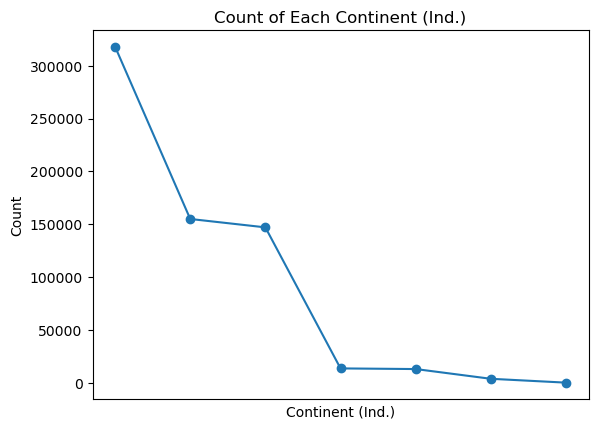

In [8]:
# Get frequency of Continent.
# We may replace artists whose frequecny is less than 50 times with "Rest" to reduce dimension.
unique_values_count = dataset["Continent"].nunique()
print(f"Number of unique values in 'Continent (Ind.)': {unique_values_count}")


value_counts = dataset["Continent"].value_counts()
threshold = [200000, 50000]
for thre in threshold:
    filtered_data = value_counts[value_counts <= thre]
    print(f"# Continents shown less or equal than {thre} times: {filtered_data.count()}")

# Plots
value_counts.plot(kind = 'line', marker='o')

plt.title("Count of Each Continent (Ind.)")
plt.xlabel("Continent (Ind.)")
plt.ylabel("Count")
plt.xticks([])

plt.show()

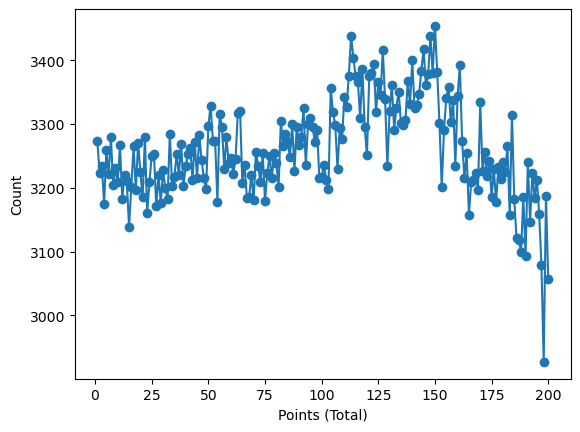

In [9]:
# Points Visualization
rank_count = dataset['Points (Total)'].value_counts().sort_index()
x_values = rank_count.index
y_values = rank_count.values

plt.plot(x_values, y_values, marker='o', linestyle='-')

plt.xlabel('Points (Total)')
plt.ylabel('Count')

plt.show()

### Scaling: "Loudness"

Standarize it into [0, 1]

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaled_feature = "Loudness"
scaler = MinMaxScaler()

dataset[scaled_feature] = scaler.fit_transform(dataset[[scaled_feature]])

## Deal with non-numeric features: ["Artist (Ind.)", "Nationality", "Continent"]
Since we have more than 2000 artists, 79 nationalities and 7 continents. For "Artists", one-hot encoding will result in Curse of Dimensionality, so we implement group label-encoding since there is ordering behind the scene. For "Nationality" and "Continent", 
we try:

0. Top-N like grouping Label encoding 
1. TF-IDF
2. Word2Vec
3. One-hot encoding
4. PCA
----------------------
5. Target Encoding
6. Supervised Learned Embedding
7. Hash encoding
8. Frequency Encoding
9. Top N Encoding


But a large number of artists will lead to huge matrix calculation and kill kernel.
We could seperate them into N = 7 groups and then do label encoding, which is versatile method of Top-N encoding.

### Label-encoding for "Artists".
Seperate "Artists" into 7 groups, and do label-encoding. 
7 is the most popular group of artist, vice versa. 

In [11]:
# # Label_encoding "Artists".
# frequency = dataset["Artist (Ind.)"].value_counts()

# art_group = pd.cut(frequency, bins = [0, 1, 10, 50, 100, 1000, 10000, 20000], labels = [1, 2, 3, 4, 5, 6, 7])
# artist = dataset["Artist (Ind.)"]
# artist = art_group[artist]
# dataset["artist_grp"]= artist.values
# dataset = dataset.drop(columns = ["Artist (Ind.)"], axis = 1).copy()

In [12]:
# Label_encoding "Artists".
# Get the average score of artists
average_scores = dataset.groupby('Artist (Ind.)')['Points (Total)'].mean()
artist = dataset["Artist (Ind.)"]
artist = average_scores[artist]
dataset["artist_grp"] = artist.values
dataset = dataset.drop(columns = ['Artist (Ind.)', 'Points (Ind for each Artist/Nat)'], axis = 1).copy()

### If a song has multiple artists, we keep only one data point by highest artist_grp.

In [13]:
dataset = dataset.loc[dataset.groupby('Title')['artist_grp'].idxmax()]
dataset = dataset.sort_index(axis = 0)
dataset = dataset.drop(columns = ['Title'], axis = 1).copy()

In [14]:
dataset.index = [i for i in range(7457)]
dataset

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,Points (Total),Artist_Count,artist_grp
0,0.668,0.758,0.814223,0.033,0.483,0.000,0.834,Mexico,Latin-America,200,2,135.258029
1,0.652,0.800,0.846376,0.061,0.143,0.629,0.234,Puerto Rico,Latin-America,199,1,121.477141
2,0.812,0.479,0.800272,0.333,0.213,0.000,0.559,Mexico,Latin-America,198,2,135.258029
3,0.783,0.592,0.726517,0.033,0.435,0.000,0.726,South Korea,Asia,197,1,126.928000
4,0.569,0.724,0.844792,0.047,0.228,0.000,0.562,Mexico,Latin-America,196,2,123.261346
...,...,...,...,...,...,...,...,...,...,...,...,...
7452,0.729,0.888,0.878474,0.122,0.117,0.000,0.800,Colombia,Latin-America,17,1,111.469181
7453,0.648,0.736,0.737189,0.039,0.044,0.000,0.378,Norway,Europe,16,1,103.274459
7454,0.457,0.899,0.886060,0.132,0.002,0.000,0.298,United States,Anglo-America,14,1,113.017544
7455,0.447,0.848,0.786461,0.222,0.033,0.000,0.485,United Kingdom,Europe,9,1,9.000000


---
## Get y label and drop 'Points (Total)' in dataset(X)
For y label, we separate them in into 10 classes.
E.g., class 10 is the most popular group.
#### Before using any dataset in models, remember to check their X and y data have no repetitive features or label.

In [15]:
# Get y and seperate into 10 classes.
y = dataset['Points (Total)']
y = pd.cut(y, bins=5, labels=[i for i in range(1,6)])

---
### Get ori_dataset

In [16]:
ori_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']
ori_dataset = dataset[ori_features]

--------
## We then try several methods to preprocess features "Nationality" and "Continent".

### Implement 1. TF-IDF for "Nationality" and "Continent".

In [17]:
# 1. TF-IDF: ["Nationality", "Continent"]

from sklearn.feature_extraction.text import TfidfVectorizer

feature_list = ["Nationality", "Continent"]
tfidf_vectorizer = TfidfVectorizer()

tfidf_dataset = dataset 
for feature_to_encode in feature_list:
    tfidf_encoded = tfidf_vectorizer.fit_transform(dataset[feature_to_encode])
    tfidf_df = pd.DataFrame(tfidf_encoded.toarray(), columns=[f"{feature_to_encode}_tfidf_{col}" for col in tfidf_vectorizer.get_feature_names_out()])
    tfidf_dataset = pd.concat([tfidf_dataset, tfidf_df], axis=1)
    
tfidf_dataset = tfidf_dataset.drop(columns = feature_list, axis = 1)

# TF-IDF Done
tfidf_dataset.drop(columns = ['Points (Total)'], inplace = True)


Pass the following cell.

## 2. Implement Word2Vec for "Nationality" and "Continent".
Precessed data was saved as 'w2v_dataset'.
I note all lines here, we only need to read .csv file again.

### Install gensim for word2vec

In [18]:
!pip install gensim scikit-learn

### Word2Vec for Nationality

In [19]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
text_data_nationality = list(dataset["Nationality"])
lst = []
lst.append(text_data_nationality)
text_data_nationality = lst

# Word2Vec Model
word2vec_model = Word2Vec(sentences=text_data_nationality, vector_size=100, min_count=1, window=5, workers=4)

In [21]:
# Word2Vec vectors
w2v_encoded = dataset['Nationality'].apply(lambda x: pd.Series(word2vec_model.wv[x]))

# # Combine datasets
w2v_dataset = pd.concat([dataset, w2v_encoded], axis=1)

# # Drop original data
w2v_dataset = w2v_dataset.drop(columns=["Nationality"])

In [22]:
new_column_names = {}
for i in range(0, 100):
    new_column_names[i] = "w2v_nat." + str(i+1)

w2v_dataset.rename(columns = new_column_names, errors='ignore')

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Continent,Points (Total),Artist_Count,...,w2v_nat.91,w2v_nat.92,w2v_nat.93,w2v_nat.94,w2v_nat.95,w2v_nat.96,w2v_nat.97,w2v_nat.98,w2v_nat.99,w2v_nat.100
0,0.668,0.758,0.814223,0.033,0.483,0.000,0.834,Latin-America,200,2,...,0.206211,0.014911,0.045632,-0.055998,0.200983,0.010839,0.232728,-0.153100,-0.157897,0.167249
1,0.652,0.800,0.846376,0.061,0.143,0.629,0.234,Latin-America,199,1,...,0.216564,0.008136,0.052147,-0.067040,0.250384,0.021209,0.258577,-0.181856,-0.176476,0.172777
2,0.812,0.479,0.800272,0.333,0.213,0.000,0.559,Latin-America,198,2,...,0.206211,0.014911,0.045632,-0.055998,0.200983,0.010839,0.232728,-0.153100,-0.157897,0.167249
3,0.783,0.592,0.726517,0.033,0.435,0.000,0.726,Asia,197,1,...,0.238373,0.001472,0.056724,-0.070699,0.248446,0.011380,0.271006,-0.174627,-0.181232,0.186505
4,0.569,0.724,0.844792,0.047,0.228,0.000,0.562,Latin-America,196,2,...,0.206211,0.014911,0.045632,-0.055998,0.200983,0.010839,0.232728,-0.153100,-0.157897,0.167249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7452,0.729,0.888,0.878474,0.122,0.117,0.000,0.800,Latin-America,17,1,...,0.237581,0.004900,0.045720,-0.059842,0.246985,0.020319,0.264178,-0.182922,-0.175222,0.183196
7453,0.648,0.736,0.737189,0.039,0.044,0.000,0.378,Europe,16,1,...,0.178291,0.009203,0.036403,-0.061402,0.187208,0.023829,0.211266,-0.126599,-0.131101,0.152459
7454,0.457,0.899,0.886060,0.132,0.002,0.000,0.298,Anglo-America,14,1,...,0.195936,0.008401,0.045879,-0.058057,0.220960,0.031952,0.196894,-0.175241,-0.153570,0.159552
7455,0.447,0.848,0.786461,0.222,0.033,0.000,0.485,Europe,9,1,...,0.220173,0.006494,0.055156,-0.074146,0.234288,0.029178,0.252402,-0.176299,-0.178761,0.179463


In [23]:
# # Saving datafram to .csv file "w2v_dataset.csv"
# w2v_dataset.to_csv('w2v_dataset.csv', index=False)

In [24]:
# # Reload dataframe
# data_loc = os.path.join(os.getcwd(), 'w2v_dataset.csv')
# w2v_dataset = pd.read_csv(data_loc, delimiter = ',')

### Word2Vec for Continent.

In [25]:
text_data_Continent = list(dataset["Continent"])
lst = []
lst.append(text_data_Continent)
text_data_Continent = lst

# Word2Vec Model
word2vec_model = Word2Vec(sentences=text_data_Continent, vector_size=10, min_count=1, window=5, workers=4)

In [26]:
# Word2Vec vectors
w2v_encoded = dataset['Continent'].apply(lambda x: pd.Series(word2vec_model.wv[x]))


In [27]:
# # Combine datasets
w2v_dataset = pd.concat([w2v_dataset, w2v_encoded], axis=1)

# # Drop original data
w2v_dataset = w2v_dataset.drop(columns=["Continent"])

In [28]:
new_column_names = {}
for i in range(0, 10):
    new_column_names[i] = "w2v_conti." + str(i+1)

w2v_dataset = w2v_dataset.rename(columns = new_column_names, errors='ignore')

In [29]:
# Saving datafram to .csv file "w2v_dataset.csv"
w2v_dataset.to_csv('w2v_dataset.csv', index=False)

In [30]:
# Reload dataframe
data_loc = os.path.join(os.getcwd(), 'w2v_dataset.csv')
w2v_dataset = pd.read_csv(data_loc, delimiter = ',')
w2v_dataset.drop(columns = ['Points (Total)'], inplace = True)

In [31]:
w2v_dataset

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Artist_Count,artist_grp,w2v_conti.1,...,w2v_conti.1.1,w2v_conti.2.1,w2v_conti.3.1,w2v_conti.4.1,w2v_conti.5.1,w2v_conti.6.1,w2v_conti.7.1,w2v_conti.8.1,w2v_conti.9.1,w2v_conti.10.1
0,0.668,0.758,0.814223,0.033,0.483,0.000,0.834,2,135.258029,-0.086036,...,0.216932,0.318439,0.531720,0.239352,-0.127395,-0.578157,0.446732,0.588540,-0.861558,-0.601430
1,0.652,0.800,0.846376,0.061,0.143,0.629,0.234,1,121.477141,-0.096899,...,0.216932,0.318439,0.531720,0.239352,-0.127395,-0.578157,0.446732,0.588540,-0.861558,-0.601430
2,0.812,0.479,0.800272,0.333,0.213,0.000,0.559,2,135.258029,-0.086036,...,0.216932,0.318439,0.531720,0.239352,-0.127395,-0.578157,0.446732,0.588540,-0.861558,-0.601430
3,0.783,0.592,0.726517,0.033,0.435,0.000,0.726,1,126.928000,-0.097636,...,0.045782,0.319490,0.661666,0.149996,-0.214134,-0.657467,0.620022,0.538272,-0.902563,-0.676821
4,0.569,0.724,0.844792,0.047,0.228,0.000,0.562,2,123.261346,-0.086036,...,0.216932,0.318439,0.531720,0.239352,-0.127395,-0.578157,0.446732,0.588540,-0.861558,-0.601430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7452,0.729,0.888,0.878474,0.122,0.117,0.000,0.800,1,111.469181,-0.082605,...,0.216932,0.318439,0.531720,0.239352,-0.127395,-0.578157,0.446732,0.588540,-0.861558,-0.601430
7453,0.648,0.736,0.737189,0.039,0.044,0.000,0.378,1,103.274459,-0.077181,...,0.236549,0.217826,0.373747,0.332784,-0.268150,-0.532952,0.463697,0.525089,-0.830395,-0.641625
7454,0.457,0.899,0.886060,0.132,0.002,0.000,0.298,1,113.017544,-0.073759,...,0.160429,0.234399,0.461767,0.357996,-0.309719,-0.583479,0.498490,0.599012,-0.799872,-0.584969
7455,0.447,0.848,0.786461,0.222,0.033,0.000,0.485,1,9.000000,-0.092879,...,0.236549,0.217826,0.373747,0.332784,-0.268150,-0.532952,0.463697,0.525089,-0.830395,-0.641625


## 3. Implement one-hot encoding for "Nationality" and "Continent".

In [32]:
feat = "Nationality"
one_hot_encoded = pd.get_dummies(dataset[feat], prefix = feat)
one_hot_dataset = pd.concat([dataset, one_hot_encoded], axis=1)
one_hot_dataset = one_hot_dataset.drop(columns = [feat])

feat = "Continent"
one_hot_encoded = pd.get_dummies(dataset[feat], prefix = feat)
one_hot_dataset = pd.concat([one_hot_dataset, one_hot_encoded], axis=1)
one_hot_dataset = one_hot_dataset.drop(columns = [feat])

In [33]:
# One-hot encoding Done.
one_hot_dataset.drop(columns = ['Points (Total)'], inplace = True)

In [34]:
one_hot_dataset

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Artist_Count,artist_grp,Nationality_ALGERIA,...,Nationality_United States,Nationality_Unknown,Nationality_Venezuela,Continent_Africa,Continent_Anglo-America,Continent_Asia,Continent_Europe,Continent_Latin-America,Continent_Oceania,Continent_Unknown
0,0.668,0.758,0.814223,0.033,0.483,0.000,0.834,2,135.258029,0,...,0,0,0,0,0,0,0,1,0,0
1,0.652,0.800,0.846376,0.061,0.143,0.629,0.234,1,121.477141,0,...,0,0,0,0,0,0,0,1,0,0
2,0.812,0.479,0.800272,0.333,0.213,0.000,0.559,2,135.258029,0,...,0,0,0,0,0,0,0,1,0,0
3,0.783,0.592,0.726517,0.033,0.435,0.000,0.726,1,126.928000,0,...,0,0,0,0,0,1,0,0,0,0
4,0.569,0.724,0.844792,0.047,0.228,0.000,0.562,2,123.261346,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7452,0.729,0.888,0.878474,0.122,0.117,0.000,0.800,1,111.469181,0,...,0,0,0,0,0,0,0,1,0,0
7453,0.648,0.736,0.737189,0.039,0.044,0.000,0.378,1,103.274459,0,...,0,0,0,0,0,0,1,0,0,0
7454,0.457,0.899,0.886060,0.132,0.002,0.000,0.298,1,113.017544,0,...,1,0,0,0,1,0,0,0,0,0
7455,0.447,0.848,0.786461,0.222,0.033,0.000,0.485,1,9.000000,0,...,0,0,0,0,0,0,1,0,0,0


## 4. Implement PCA on whole dataset.|

In [35]:
from sklearn.decomposition import PCA
from pandas.api.types import CategoricalDtype

In [36]:
dataset

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,Points (Total),Artist_Count,artist_grp
0,0.668,0.758,0.814223,0.033,0.483,0.000,0.834,Mexico,Latin-America,200,2,135.258029
1,0.652,0.800,0.846376,0.061,0.143,0.629,0.234,Puerto Rico,Latin-America,199,1,121.477141
2,0.812,0.479,0.800272,0.333,0.213,0.000,0.559,Mexico,Latin-America,198,2,135.258029
3,0.783,0.592,0.726517,0.033,0.435,0.000,0.726,South Korea,Asia,197,1,126.928000
4,0.569,0.724,0.844792,0.047,0.228,0.000,0.562,Mexico,Latin-America,196,2,123.261346
...,...,...,...,...,...,...,...,...,...,...,...,...
7452,0.729,0.888,0.878474,0.122,0.117,0.000,0.800,Colombia,Latin-America,17,1,111.469181
7453,0.648,0.736,0.737189,0.039,0.044,0.000,0.378,Norway,Europe,16,1,103.274459
7454,0.457,0.899,0.886060,0.132,0.002,0.000,0.298,United States,Anglo-America,14,1,113.017544
7455,0.447,0.848,0.786461,0.222,0.033,0.000,0.485,United Kingdom,Europe,9,1,9.000000


In [128]:
# Parameter N should be discussed!!!!!
pca = PCA(n_components = 3) # Keep 95% of information. 
pca_dataset = pca.fit_transform(dataset.copy().drop(columns=['Nationality', 'Continent', 'Points (Total)'])); pred = [[288, 8, 19, 23, 23], [20, 104, 13, 8, 15], [6, 1, 173, 9, 9], [15, 8, 20, 229, 4], [21, 25, 12, 3, 271]]
# pca_dataset = pca.fit_transform(one_hot_dataset.copy().drop(columns=['Points (Total)']))


In [129]:
pca_dataset = pd.DataFrame(pca_dataset); kappa = 0.759

In [39]:
# Saving datafram to .csv file "pca_dataset.csv"
pca_dataset.to_csv('pca_dataset.csv', index=False)

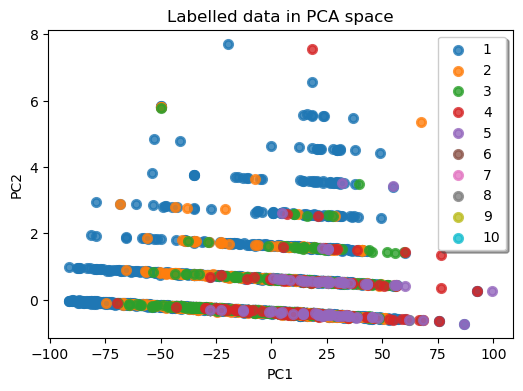

In [40]:
labels = [l for l in range(1, 11)]

plt.figure(figsize=(6, 4))
for label in labels:
    plt.scatter(pca_dataset[y == label][0], pca_dataset[y == label][1], label = label, lw = 2, alpha = 0.8)
#     plt.scatter(pca_dataset[y == label, 0], pca_dataset[y == label, 1], pca_dataset[y == label, 2], label = label)


plt.title("Labelled data in PCA space")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = "best", shadow = True, scatterpoints = 1)
plt.show()

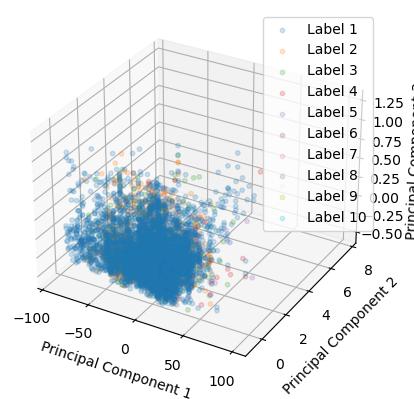

In [41]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label in [i for i in range(1,11)]:
    ax.scatter(pca_dataset[y == label][0], pca_dataset[y == label][1], pca_dataset[y == label][2], label=f'Label {label}', s=10, alpha = 0.2)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.legend()
plt.show()


In [42]:
print(pca.components_.shape, pca.explained_variance_, pca.n_components_)

(3, 9) [7.05489529e+02 5.89208689e-01 8.03401288e-02] 3


# Multi-class Logistic Regression

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### 1. TF-IDF dataseest

In [44]:
X_train, X_val, y_train, y_val = train_test_split(tfidf_dataset, y, test_size = 0.20) 

In [45]:
# Setting 1
model_tfidf = LogisticRegression(max_iter = 1000, multi_class='ovr') # one vs rest (one vs all)
model_tfidf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [46]:
print(model_tfidf.score(X_val, y_val))

0.7560321715817694


In [47]:
# Setting 2
model_tfidf2 = LogisticRegression(max_iter = 1000, solver = 'newton-cholesky') # one vs rest (one vs all)
model_tfidf2.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='newton-cholesky')

In [48]:
print(model_tfidf2.score(X_val, y_val))

0.7560321715817694


In [49]:
# Setting 3
model_tfidf3 = LogisticRegression(max_iter = 1000, multi_class='multinomial')
model_tfidf3.fit(X_train, y_train)
model_tfidf3.score(X_val, y_val)

/Users/edlin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7553619302949062

#### 2. Word2vec dataset.

In [50]:
X_train, X_val, y_train, y_val = train_test_split(w2v_dataset, y, test_size = 0.20) 
model_w2v = LogisticRegression(max_iter = 1000, multi_class='multinomial')
model_w2v.fit(X_train, y_train)
model_w2v.score(X_val, y_val)

/Users/edlin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7459785522788204

#### 3. One-hot encoding dataset.

Get test set and validation set.

In [51]:
X_train, X_val, y_train, y_val = train_test_split(one_hot_dataset, y, test_size = 0.20)

In [52]:
# Setting 1
model = LogisticRegression(max_iter = 1000, multi_class='ovr') # one vs rest (one vs all)
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.7560321715817694

In [53]:
# Setting 2
model = LogisticRegression(max_iter = 1000, solver = 'newton-cholesky')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cholesky')

In [54]:
model.score(X_val, y_val)

0.7560321715817694

In [55]:
# Setting 3
model = LogisticRegression(max_iter = 2000, multi_class='multinomial')
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, multi_class='multinomial')

#### 4. PCA dataset.

In [56]:
data_loc = os.path.join(os.getcwd(), 'pca_dataset.csv')
pca_dataset = pd.read_csv(data_loc, delimiter = ',')

In [57]:
X_train, X_val, y_train, y_val = train_test_split(pca_dataset, y, test_size = 0.20) 

In [58]:
# Setting 1
model_pca = LogisticRegression(max_iter = 1000, multi_class='ovr',  C = 1) # one vs rest (one vs all)
model_pca.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, multi_class='ovr')

In [59]:
model_pca.score(X_val, y_val)

0.7466487935656837

### Without Continent and Nationality

In [60]:
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 'Artist_Count', 'artist_grp']

X_train, X_val, y_train, y_val = train_test_split(dataset[features], y, test_size = 0.20) 

model_wcn = LogisticRegression(max_iter = 1000, multi_class='ovr',  C = 1) # one vs rest (one vs all)
model_wcn.fit(X_train, y_train)
model_wcn.score(X_val, y_val)

0.7486595174262735

In [62]:
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 'Artist_Count', 'artist_grp'] 
# features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 'artist_grp'] 
tmp_dataset = dataset[features]
tmp_y = dataset['Points (Total)']
tmp_y = pd.cut(tmp_y, bins = 5, labels=[i for i in range(1, 6)])

In [63]:
X_train, X_val, y_train, y_val = train_test_split(tmp_dataset, tmp_y, test_size = 0.20) 

In [64]:
model_pca = LogisticRegression(max_iter = 1000, solver = 'newton-cholesky')
model_pca.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cholesky')

In [65]:
model_pca.score(X_val, y_val)

0.7312332439678284

In [66]:
model_pca.coef_

array([[ 1.35952563e+00,  6.28971525e-02,  1.24441039e+00,
        -2.77243332e-01,  8.74672416e-02,  1.65717792e-01,
        -2.95204792e-02,  7.53288422e-02, -2.29335708e-03],
       [-8.52014543e-01, -1.53972150e-01, -1.04931369e+00,
         3.47118982e-01, -1.81173832e-01, -8.61686454e-02,
        -1.42686280e-01, -1.36251027e-01, -2.75701477e-03],
       [-1.49013744e+00,  1.91403661e-01, -3.76493598e-01,
         8.57924700e-01, -1.50425934e-01, -2.57630415e-01,
        -1.73625533e-01, -7.46193399e-02,  1.02801981e-03],
       [-1.19161650e+00, -2.04155058e-01, -1.25317779e+00,
        -1.14611846e+00,  5.73773544e-01,  3.35541487e-01,
         6.69109676e-01,  1.04637675e-01,  2.72446777e-02],
       [-2.33085739e-01, -7.92067446e-02,  1.63709423e-01,
        -1.25642841e+00,  7.44516719e-01, -2.24902049e-01,
         7.91861893e-01,  1.57165055e-01,  5.09914105e-02]])

In [67]:
X_train

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Artist_Count,artist_grp
1855,0.594,0.370,0.664573,0.173,0.749,0.000,0.329,1,101.086738
6443,0.859,0.413,0.752446,0.182,0.132,0.000,0.697,1,78.000000
7268,0.877,0.763,0.806525,0.266,0.012,0.000,0.717,1,43.500000
2085,0.742,0.734,0.802940,0.041,0.629,0.003,0.541,1,137.611074
5754,0.771,0.661,0.771371,0.092,0.131,0.000,0.183,2,57.375000
...,...,...,...,...,...,...,...,...,...
2824,0.658,0.717,0.839762,0.063,0.085,0.002,0.595,1,42.333333
3978,0.550,0.598,0.807942,0.083,0.132,0.000,0.543,2,121.477141
5631,0.666,0.426,0.701617,0.147,0.383,0.000,0.587,1,109.281013
5529,0.429,0.559,0.749833,0.152,0.139,0.009,0.347,1,103.514602


---
# SVM

In [68]:
from sklearn import svm

### TF-IDF

In [69]:
tfidf_dataset

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Artist_Count,artist_grp,Nationality_tfidf_africa,...,Nationality_tfidf_venezuela,Nationality_tfidf_zealand,Continent_tfidf_africa,Continent_tfidf_america,Continent_tfidf_anglo,Continent_tfidf_asia,Continent_tfidf_europe,Continent_tfidf_latin,Continent_tfidf_oceania,Continent_tfidf_unknown
0,0.668,0.758,0.814223,0.033,0.483,0.000,0.834,2,135.258029,0.0,...,0.0,0.0,0.0,0.412144,0.000000,0.0,0.0,0.911119,0.0,0.0
1,0.652,0.800,0.846376,0.061,0.143,0.629,0.234,1,121.477141,0.0,...,0.0,0.0,0.0,0.412144,0.000000,0.0,0.0,0.911119,0.0,0.0
2,0.812,0.479,0.800272,0.333,0.213,0.000,0.559,2,135.258029,0.0,...,0.0,0.0,0.0,0.412144,0.000000,0.0,0.0,0.911119,0.0,0.0
3,0.783,0.592,0.726517,0.033,0.435,0.000,0.726,1,126.928000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.0
4,0.569,0.724,0.844792,0.047,0.228,0.000,0.562,2,123.261346,0.0,...,0.0,0.0,0.0,0.412144,0.000000,0.0,0.0,0.911119,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7452,0.729,0.888,0.878474,0.122,0.117,0.000,0.800,1,111.469181,0.0,...,0.0,0.0,0.0,0.412144,0.000000,0.0,0.0,0.911119,0.0,0.0
7453,0.648,0.736,0.737189,0.039,0.044,0.000,0.378,1,103.274459,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.0
7454,0.457,0.899,0.886060,0.132,0.002,0.000,0.298,1,113.017544,0.0,...,0.0,0.0,0.0,0.654731,0.755862,0.0,0.0,0.000000,0.0,0.0
7455,0.447,0.848,0.786461,0.222,0.033,0.000,0.485,1,9.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.0


In [70]:
X_train, X_val, y_train, y_val = train_test_split(tfidf_dataset, y, test_size = 0.20)

In [71]:
svm_clf_tfidf = svm.SVC(kernel='rbf', max_iter = 1000, C=1, gamma='auto')
svm_clf_tfidf.fit(X_train,y_train)
svm_clf_tfidf.score(X_val, y_val)

/Users/edlin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.7272117962466488

### w2v

In [72]:
X_train, X_val, y_train, y_val = train_test_split(w2v_dataset, y, test_size = 0.20)
svm_clf_tfidf = svm.SVC(kernel='rbf', max_iter = 1000, C=1, gamma='auto')
svm_clf_tfidf.fit(X_train,y_train)
svm_clf_tfidf.score(X_val, y_val)

/Users/edlin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.7138069705093834

### One-hot

In [73]:
X_train, X_val, y_train, y_val = train_test_split(one_hot_dataset, y, test_size = 0.20)
svm_clf_onehot = svm.SVC(kernel='rbf', max_iter = 1000, C=1, gamma='auto')
svm_clf_onehot.fit(X_train,y_train)
svm_clf_onehot.score(X_val, y_val)

/Users/edlin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.7412868632707775

### PCA

In [74]:
X_train, X_val, y_train, y_val = train_test_split(pca_dataset, y, test_size = 0.20)
svm_clf_pca = svm.SVC(kernel='rbf', max_iter = 1000, C=1, gamma='auto')
svm_clf_pca.fit(X_train,y_train)
svm_clf_pca.score(X_val, y_val)

/Users/edlin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.735254691689008

### Without Continent and Nationality

In [75]:
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 'Artist_Count', 'artist_grp']

X_train, X_val, y_train, y_val = train_test_split(dataset[features], y, test_size = 0.20)
svm_clf_pca = svm.SVC(kernel='rbf', max_iter = 1000, C=1, gamma='auto')
svm_clf_pca.fit(X_train,y_train)
svm_clf_pca.score(X_val, y_val)

/Users/edlin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.7198391420911529

---
### Random Forest

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [77]:
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 'Artist_Count', 'artist_grp']
# features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']


tmp = one_hot_dataset.copy().drop(columns = ['Points (Total)'])
X_train, X_test, y_train, y_test = train_test_split(tmp[features], y, test_size = 0.2, random_state=42)

model = RandomForestClassifier().fit(X_train, y_train)

predictions = model.predict(X_test)
print(model.score(X_test, y_test))

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

KeyError: "['Points (Total)'] not found in axis"

In [79]:
X_train

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Artist_Count,artist_grp
3337,0.926,0.542,0.817335,0.293,0.135,0.0,0.564,1,95.203136
4665,0.595,0.627,0.770454,0.033,0.229,0.0,0.574,1,71.181102
6221,0.880,0.728,0.765229,0.205,0.136,0.0,0.715,1,88.006000
5173,0.635,0.902,0.859160,0.109,0.172,0.0,0.286,2,104.263374
4059,0.915,0.556,0.719042,0.216,0.015,0.0,0.670,1,32.600000
...,...,...,...,...,...,...,...,...,...
5524,0.497,0.770,0.838623,0.076,0.047,0.0,0.470,1,69.115741
1499,0.834,0.680,0.844625,0.042,0.050,0.0,0.320,3,109.203684
762,0.252,0.118,0.957575,0.033,0.945,0.0,0.140,1,73.743902
4638,0.404,0.806,0.957933,0.050,0.198,0.0,0.112,1,93.423868


## Results Plot

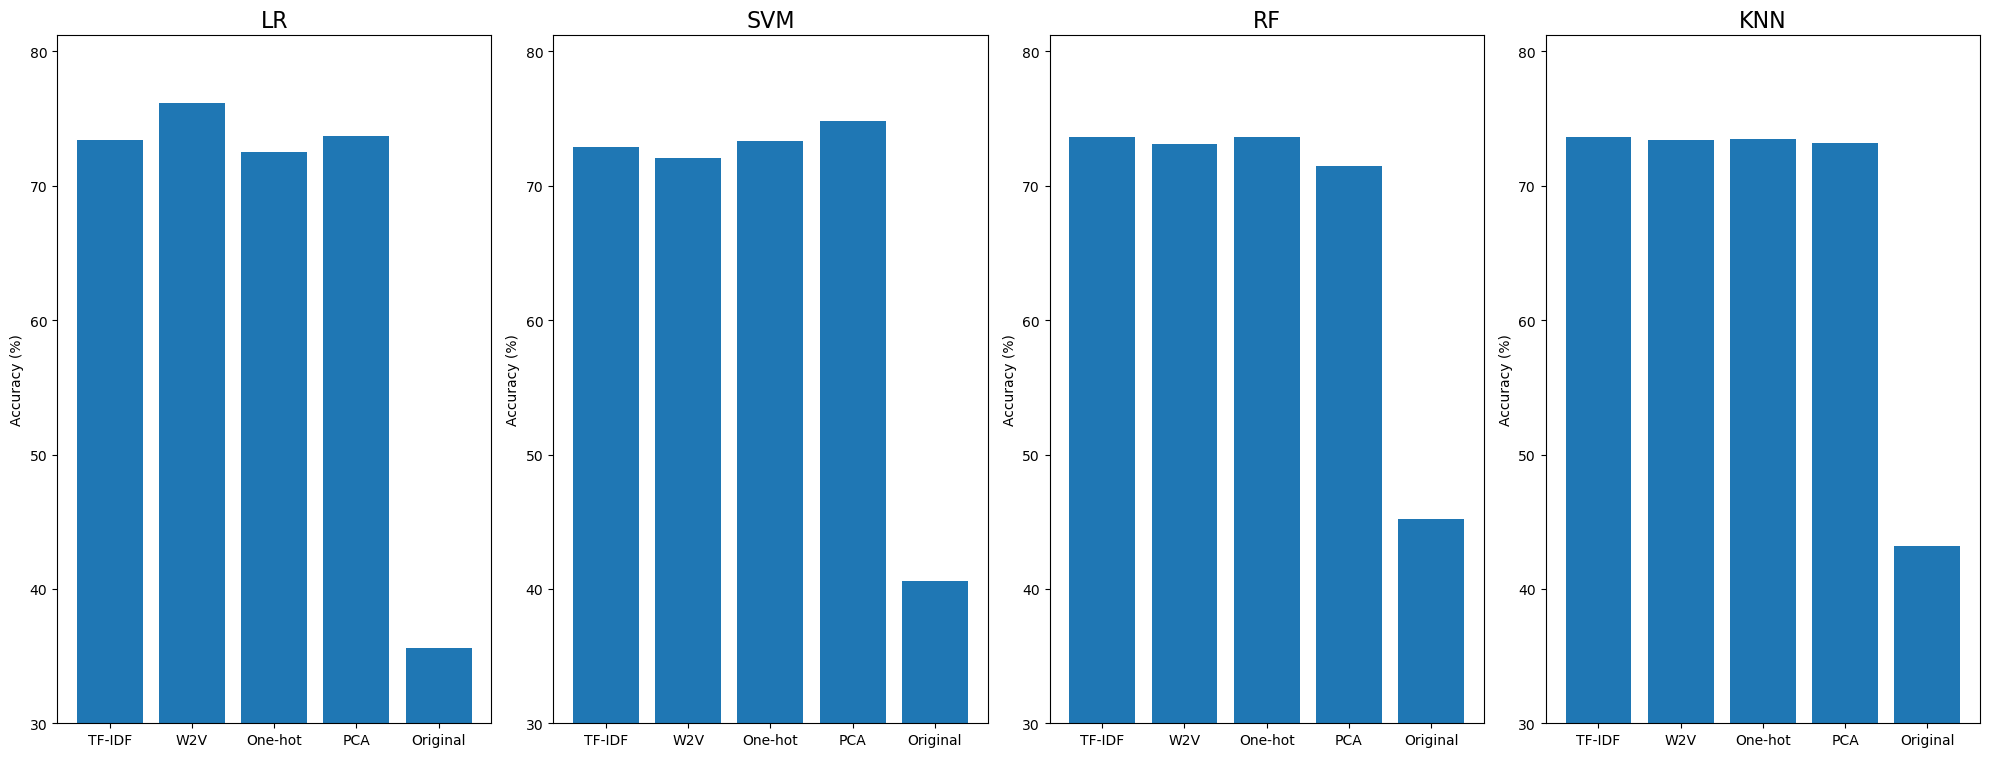

In [80]:
categories = ['TF-IDF', 'W2V', 'One-hot', 'PCA', 'Original']

x = range(1, 6)
LR = [73.4, 76.2, 72.5, 73.7, 35.6]
SVM = [72.9, 72.1, 73.3, 74.8, 40.6]
RF = [73.6, 73.1, 73.6, 71.5, 45.2]
KNN = [73.6, 73.4, 73.5, 73.2, 43.2]

models = [LR, SVM, RF, KNN]
titles = ['LR', 'SVM', 'RF', 'KNN']

fig, axes = plt.subplots(1,4, figsize = (20,8))

for i, (model, title) in enumerate(zip(models, titles)):

    axes[i].bar(x, model, tick_label = categories)
    
    # Set subplot title
    axes[i].set_title(title, fontsize = 16)
#     axes[i].get_xaxis().set_visible(False)
#     axes[i].get_yaxis().set_visible(False)


    axes[i].set_ylim(30, max(LR) + 5)

    axes[i].set_ylabel('Accuracy (%)')


plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


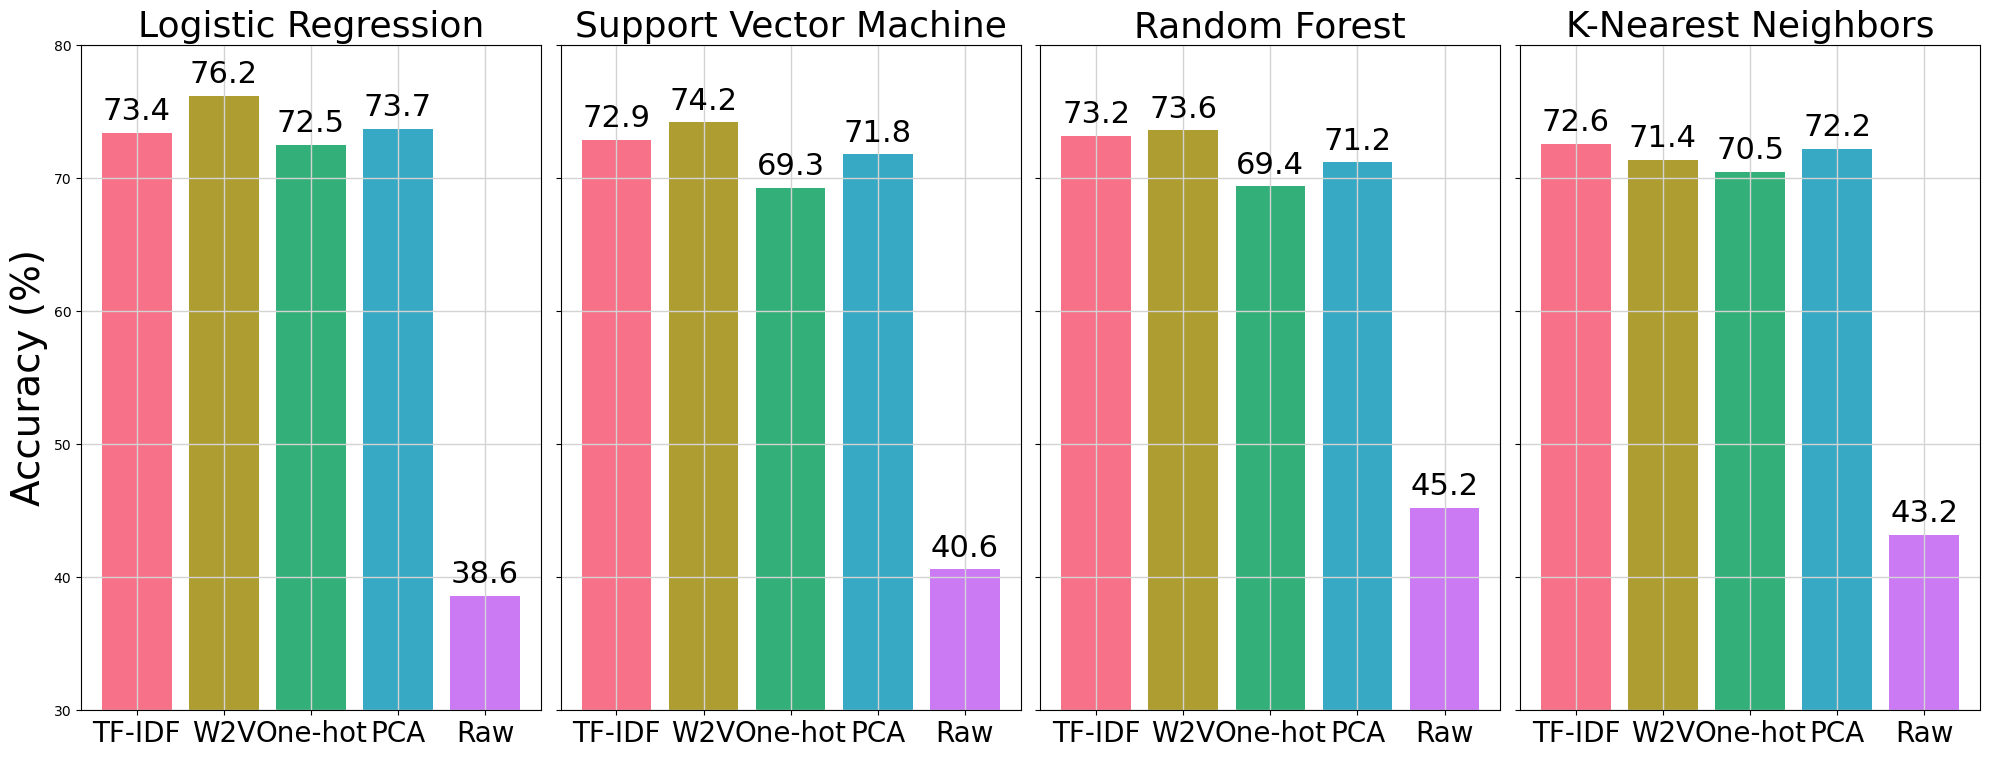

In [81]:
categories = ['TF-IDF', 'W2V', 'One-hot', 'PCA', 'Raw']
x = np.arange(len(categories)) + 1 

LR = [73.4, 76.2, 72.5, 73.7, 38.6]
SVM = [72.9, 74.2, 69.3, 71.8, 40.6]
RF = [73.2, 73.6, 69.4, 71.2, 45.2]
KNN = [72.6, 71.4, 70.5, 72.2, 43.2]

models = [LR, SVM, RF, KNN]
titles = ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbors']

# colors = ['blue', 'green', 'orange', 'red', 'yellow']
colors = sns.color_palette('husl', n_colors = 5)

fig, axes = plt.subplots(1, 4, figsize=(20, 8), sharey=True)

for i, (model, title) in enumerate(zip(models, titles)):
    axes[i].bar(x, model, color=colors, tick_label = categories)

    for j, value in enumerate(model):
        axes[i].text(x[j], value + 0.5, f'{value:.1f}', ha='center', va='bottom', fontsize=22)

    axes[i].set_title(title, fontsize=26)

    if i == 0:
        axes[i].set_ylabel('Accuracy (%)', fontsize = 28)
    
    axes[i].grid(color = 'lightgrey', linewidth = 1)
#     axes[i].set_facecolor('ghostwhite')
    
    axes[i].tick_params(axis='x', labelsize = 20)
    
axes[0].set_ylim(30, 80)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


## Visualization

In [82]:
!pip install umap-learn

In [83]:
import umap

In [84]:
# titles = ['Original data', 'PCA', 'One-hot', 'TF-IDF', 'W2V']
# dataframes = [ori_dataset, pca_dataset, one_hot_dataset, tfidf_dataset, w2v_dataset]

# reducer = umap.UMAP(n_neighbors = 10, min_dist = 0.1, metric='euclidean')
# embedding = reducer.fit_transform('dataframe')

# colors = [sns.color_palette()[x-1] for x in y]

# # Plotting each class separately to create legends
# for i in range(1, 6):  
#     mask = (y == i)
#     plt.scatter(
#         embedding[mask, 0],
#         embedding[mask, 1],
#         c = [colors[j] for j in range(len(y)) if mask[j]],
#         label = f'C{i}',
#         alpha = 1,  
#         s = 3
#     )
# plt.legend()
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('title', fontsize=24);

ValueError: could not convert string to float: 'dataframe'

/Users/edlin/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


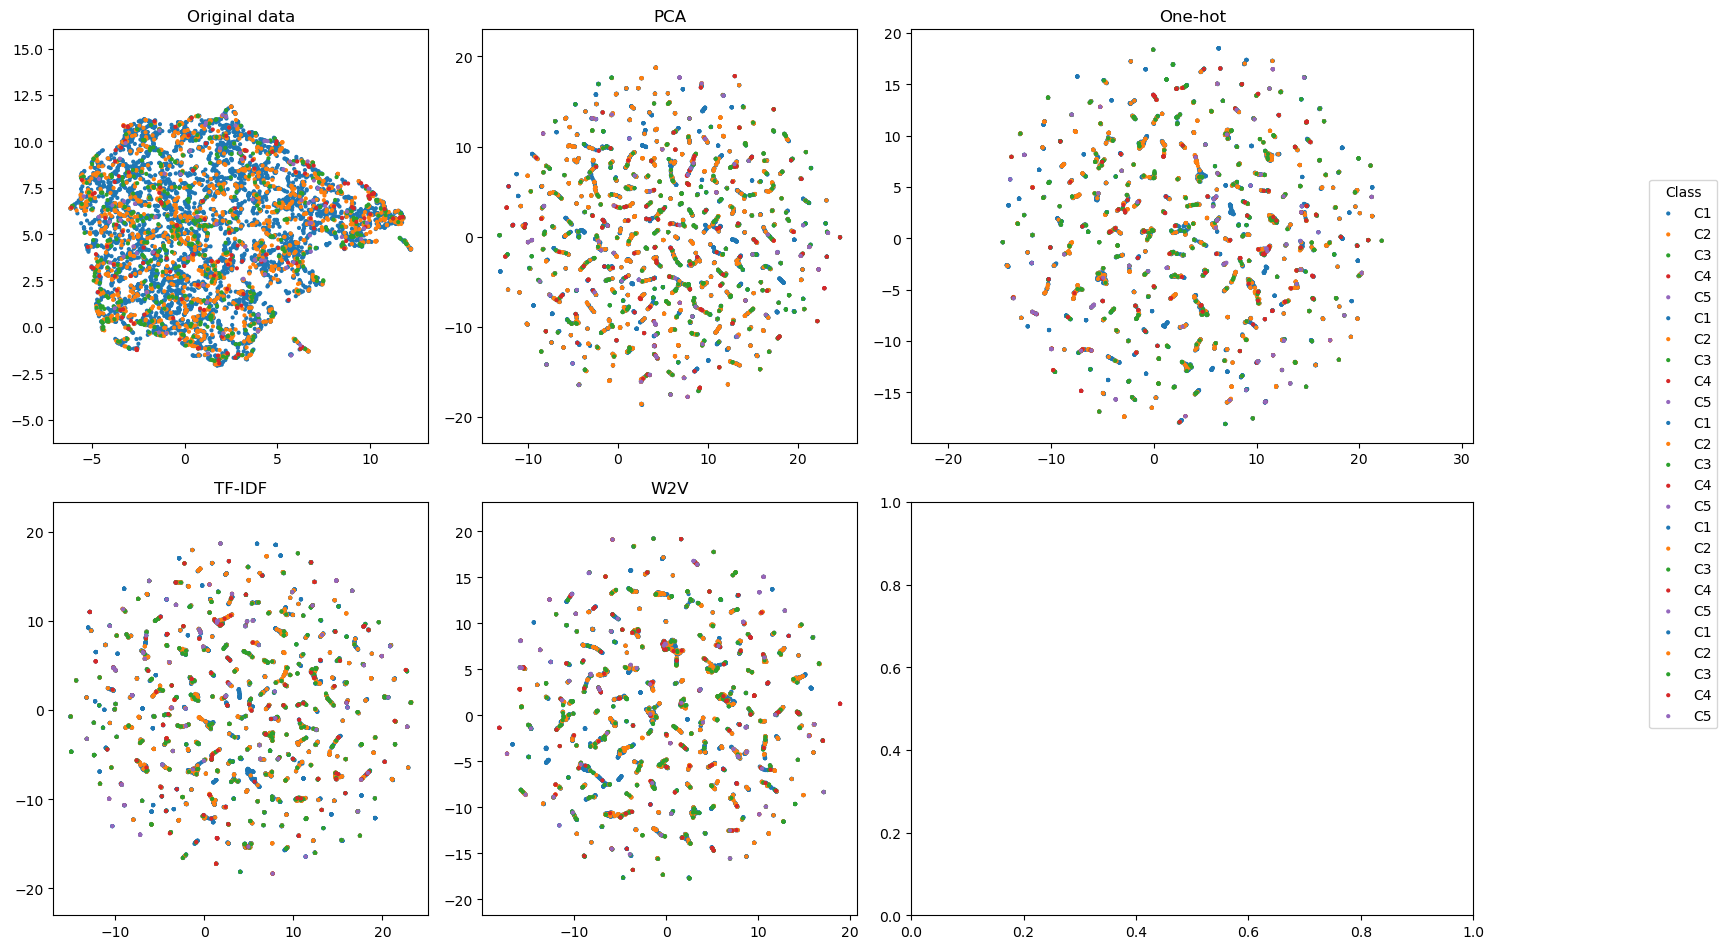

In [85]:
# Assuming you have a list of dataframes and a list of titles
titles = ['Original data', 'PCA', 'One-hot', 'TF-IDF', 'W2V']
dataframes = [ori_dataset, pca_dataset, one_hot_dataset, tfidf_dataset, w2v_dataset]

# Set up the subplots with a custom grid layout
fig, axes = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'width_ratios': [1, 1, 1.5]})

# Overall title
# fig.suptitle('UMAP projection of Different Datasets', fontsize=24)

# Loop through each dataframe and title to create a subplot
for i, (df, title) in enumerate(zip(dataframes, titles)):
    # Compute UMAP embedding
    reducer = umap.UMAP(n_neighbors = 5, min_dist=0.1, metric='euclidean')
    embedding = reducer.fit_transform(df)

    # Creating a list of colors based on class labels (replace with your actual labels)
    colors = [sns.color_palette()[x-1] for x in y]

    # Plotting each class separately to create legends
    for j in range(1, 6):  # Assuming you have 5 classes
        mask = (y == j)
        axes[i // 3, i % 3].scatter(
            embedding[mask, 0],
            embedding[mask, 1],
            c=[colors[k] for k in range(len(y)) if mask[k]],
            label=f'C{j}',
            alpha=1,  # Adjust transparency if needed
            s = 4
        )

    # Set subplot title
    axes[i // 3, i % 3].set_title(title)
    axes[i // 3, i % 3].set_aspect('equal', 'datalim')

# Add a common legend on the right side
fig.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), title='Class')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [86]:
embeddings = []
titles = ['Original data', 'PCA', 'One-hot', 'TF-IDF', 'W2V']
dataframes = [ori_dataset, pca_dataset, one_hot_dataset, tfidf_dataset, w2v_dataset]

embeddings.clear()
for i, (df, title) in enumerate(zip(dataframes, titles)):
    # Compute UMAP embedding
    reducer = umap.UMAP(n_neighbors = 10, min_dist=0.1, metric='euclidean')
    embedding = reducer.fit_transform(df)
    embeddings.append(embedding)

In [88]:
embeddings

[array([[ 3.4395888,  9.257163 ],
        [ 8.08549  ,  1.933205 ],
        [ 1.7308224,  5.4181137],
        ...,
        [-2.913724 ,  1.3769759],
        [-3.5410514,  1.804608 ],
        [-1.07741  ,  7.222774 ]], dtype=float32),
 array([[ 18.635916 ,   9.290466 ],
        [  1.9028133,  11.791484 ],
        [ 18.63514  ,   9.298459 ],
        ...,
        [  3.3211873,   2.8326292],
        [  6.2234955, -12.357371 ],
        [ 11.11898  ,  -0.7879285]], dtype=float32),
 array([[ -8.291224  ,  13.934829  ],
        [-10.838793  ,   5.774225  ],
        [ -8.289724  ,  13.930825  ],
        ...,
        [ -0.9806036 ,  -3.0926204 ],
        [  7.1326494 ,   5.464539  ],
        [  0.01719498,  -7.2921386 ]], dtype=float32),
 array([[-6.88793  , 17.298267 ],
        [19.431288 ,  2.1990178],
        [-6.871097 , 17.274345 ],
        ...,
        [-3.3716218, -9.486534 ],
        [ 7.5236974, 19.633795 ],
        [ 2.2758405,  1.2561916]], dtype=float32),
 array([[20.980263 , -3.5671

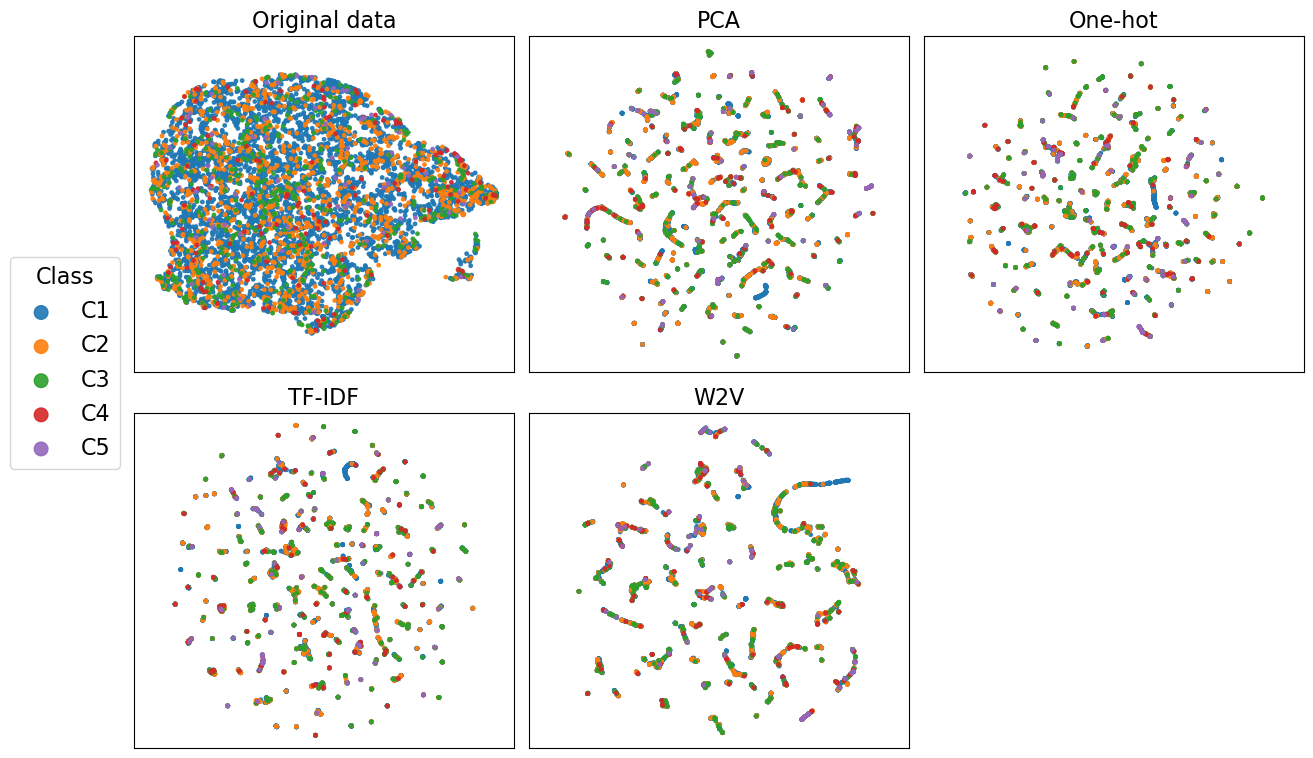

In [89]:
titles = ['Original data', 'PCA', 'One-hot', 'TF-IDF', 'W2V']
dataframes = [ori_dataset, pca_dataset, one_hot_dataset, tfidf_dataset, w2v_dataset]


fig, axes = plt.subplots(2, 3, figsize=(12, 8), subplot_kw={'aspect': 'equal'})

for i, (embedding, df, title) in enumerate(zip(embeddings, dataframes, titles)):
    
    colors = [sns.color_palette()[x-1] for x in y]

    for j in range(1, 6):  
        mask = (y == j)
        axes[i // 3, i % 3].scatter(
            embedding[mask, 0],
            embedding[mask, 1],
            c=[colors[k] for k in range(len(y)) if mask[k]],
            label=f'C{j}',
            alpha=0.9,  
            s=6
        )

    # Set subplot title
    axes[i // 3, i % 3].set_title(title, fontsize=16)
    axes[i // 3, i % 3].set_aspect('equal', 'datalim')
    axes[i // 3, i % 3].get_xaxis().set_visible(False)
    axes[i // 3, i % 3].get_yaxis().set_visible(False)

fig.delaxes(axes[1, 2])

lines, lables = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, lables, loc='center left', title='Class', title_fontsize='16', bbox_to_anchor=(-0.1, 0.5), fontsize = 16, markerscale=4)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


---
## t-SNE

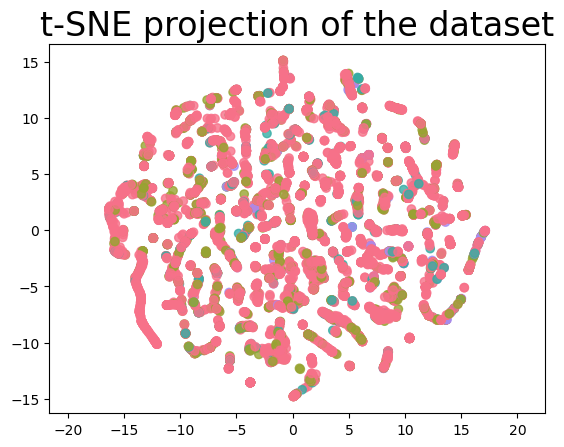

In [90]:
from sklearn.manifold import TSNE

# t-SNE
reducer_tsne = TSNE(n_components=2, perplexity=20, n_iter=300, random_state=42)
embedding_tsne = reducer_tsne.fit_transform(tfidf_dataset)

# Create a scatter plot with different colors for each class
scatter_tsne = plt.scatter(
    embedding_tsne[:, 0],
    embedding_tsne[:, 1],
    c=y,
    cmap=sns.color_palette("husl", as_cmap=True),  
    alpha=0.8,  
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('t-SNE projection of the dataset', fontsize=24)
plt.show()


---

## Logistic Regression Final Test

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
res = []

In [114]:
model_w2v = LogisticRegression(max_iter = 1000, multi_class='multinomial')
scores = cross_val_score(model_w2v, w2v_dataset, y, cv=5)

/Users/edlin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/edlin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [115]:
print(scores)
print(scores.mean())

[0.73659517 0.73659517 0.7370892  0.73641851 0.7370892 ]
0.7367574526695473


In [116]:
X_train, X_test, y_train, y_test = train_test_split(w2v_dataset, y, test_size = 0.20) 

In [132]:
model_w2v = LogisticRegression(max_iter = 1000, multi_class='multinomial')
model_w2v.fit(X_train, y_train)
print("LR Accuracy: ", model_w2v.score(X_test, y_test))

Accuracy:  0.7459785522788204


/Users/edlin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix

Random Forest free try

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

model = RandomForestClassifier().fit(X_train, y_train)

predictions = model.predict(X_test)
print(model.score(X_test, y_test))

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


0.7365951742627346
Mean Squared Error: 0.7164879356568364


Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression')

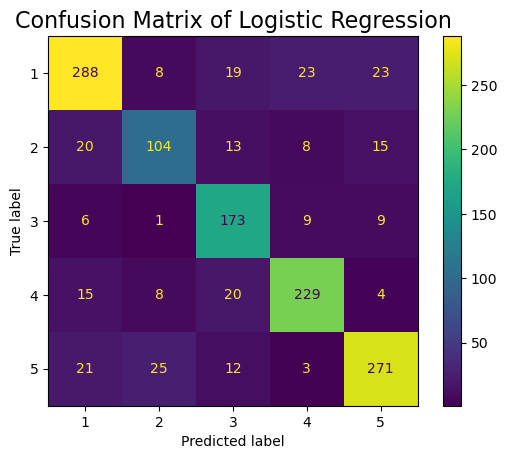

In [99]:
cm = np.array(pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,2,3,4,5])
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix of Logistic Regression', fontsize = 16)


In [125]:
from sklearn.metrics import cohen_kappa_score

res.appemd(cohen_kappa_score(y_test, predictions))
print(kappa)

In [131]:
# Confusion matrix
confusion_matrix = np.array(pred)

TP = np.diag(confusion_matrix)
TN = np.sum(confusion_matrix) - (np.sum(confusion_matrix, axis=0) + np.sum(confusion_matrix, axis=1) - TP)
FP = np.sum(confusion_matrix, axis=0) - TP
FN = np.sum(confusion_matrix, axis=1) - TP

# Calculate MCC
numerator = TP * TN - FP * FN
denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
mcc = numerator / denominator

overall_mcc = np.mean(mcc)

print("Kappa: ", kappa)
print("Matthews Correlation Coefficient (MCC):")
print("MCC for each class:", mcc)
print("Overall MCC:", overall_mcc)

Kappa:  0.759
Matthews Correlation Coefficient (MCC):
MCC for each class: [0.74083452 0.63895414 0.76004761 0.7930678  0.77292265]
Overall MCC: 0.7411653453086823


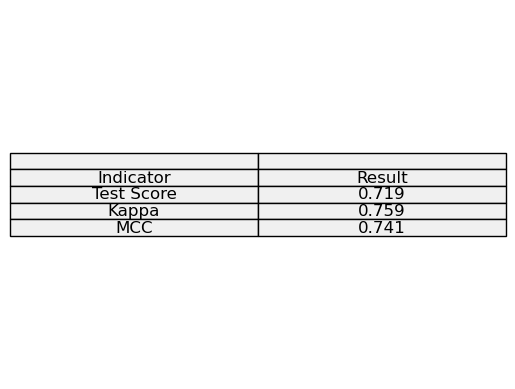

In [108]:
# Make table.
indicators = ['Test Score', 'Kappa', 'MCC']
results = [0.719, 0.759, 0.741]

fig, ax = plt.subplots()

ax.axis('off')
table_data = [['Indicator', 'Result']] + list(zip(indicators, results))
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colLabels=None, cellColours=[['#f0f0f0']*2]*4, colColours=['#f0f0f0']*2)
table.auto_set_font_size(False)
table.set_fontsize(12)

plt.show()
